### Ejemplo 1
Generamos nosotros los datos aleatoriamente

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Generamos datos esféricos
from sklearn.datasets.samples_generator import make_blobs

In [3]:
X, y = make_blobs(n_samples=300, random_state=1)

In [6]:
X # Son puntos del plano

array([[-1.10195984e+01, -3.15882031e+00],
       [-6.38088086e+00, -8.50663809e+00],
       [-1.12174569e+01, -1.50397990e+00],
       [-1.61589091e+00,  4.18017563e+00],
       [-1.46126019e+00,  4.52549851e+00],
       [-1.13009458e+00,  4.54419108e+00],
       [-1.01336898e+01, -4.75061833e+00],
       [-7.58703957e-01,  3.72276201e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.48773915e+00, -8.06676370e+00],
       [-7.32386504e+00, -7.96393491e+00],
       [-5.67856792e+00, -7.60509852e+00],
       [-8.43890696e+00, -3.84394585e+00],
       [-1.09947323e+01, -4.06014253e+00],
       [-8.17259469e+00, -8.17094642e+00],
       [-1.41076074e+00,  4.10984872e+00],
       [-1.13296642e+01, -5.71403711e+00],
       [-1.25041532e+01, -6.06751247e+00],
       [-1.34052081e+00,  4.15711949e+00],
       [-1.01077040e+01, -3.94479960e+00],
       [-8.18717759e+00, -5.25907547e+00],
       [-1.01659113e+01, -4.12752889e+00],
       [-5.27930518e-01,  5.92630669e+00],
       [-1.

In [7]:
y # Son los grupos de cada punto

array([1, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0,
       1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 2,
       2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1,
       0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1,
       2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1,
       0, 2, 2, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1,
       0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0,
       1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1,
       2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2])

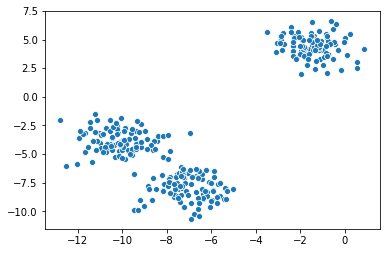

In [8]:
sns.scatterplot(X[:,0],X[:,1])

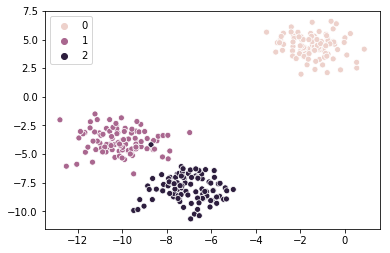

In [9]:
# Los agrupamientos reales
sns.scatterplot(X[:,0],X[:,1], hue=y)

Voy a predecir agrupamientos con KMedias:

In [10]:
from sklearn.cluster import KMeans

In [11]:
# Definir
kmeans = KMeans(n_clusters=3, n_init=10)
# Con n_init hacemos que inicialize el algoritmo varias veces y escoja el de inercia mínima

# Ajustar
kmeans.fit(X)

# Predecir
y_pred=kmeans.predict(X)

Vamos a ver los agrupamientos que hemos predicho:

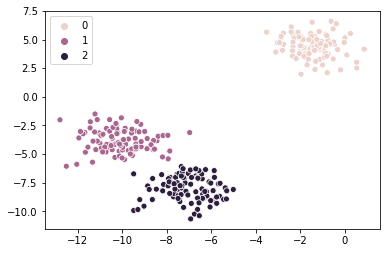

In [12]:
sns.scatterplot(X[:,0],X[:,1],hue=y_pred)

Podemos sacar los centroides:

In [13]:
centroides = kmeans.cluster_centers_
centroides

array([[ -1.4531567 ,   4.40756967],
       [-10.07499139,  -3.8699274 ],
       [ -7.05318146,  -8.00168371]])

Me los puedo pintar

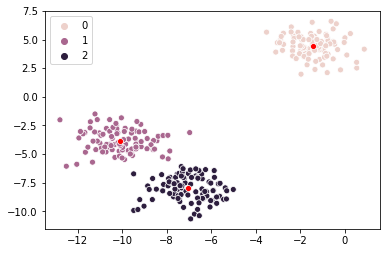

In [14]:
sns.scatterplot(X[:,0],X[:,1],hue=y_pred)
sns.scatterplot(centroides[:,0],centroides[:,1],color='red')

Puedo evaluar el modelo con una confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y,y_pred)

array([[100,   0,   0],
       [  0,  99,   1],
       [  0,   1,  99]])

Viendo el dibujo original no estaba tan claro que fueran 3 clusters y no 2.
Vamos a hallar el K óptimo usando el método del codo.

    *Cómo hallar la inercia:

In [17]:
kmeans.inertia_

573.9391587506091

In [19]:
inercias=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,n_init=10)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)

In [20]:
inercias

[12387.458611910348,
 1884.0764333574893,
 573.9391587506091,
 492.1017017571465,
 420.7181275737736,
 362.43609663838225,
 315.2692980170799,
 268.1845778510234,
 236.08229234483653,
 218.84860124777992]

Text(4, 3000, 'Codo')

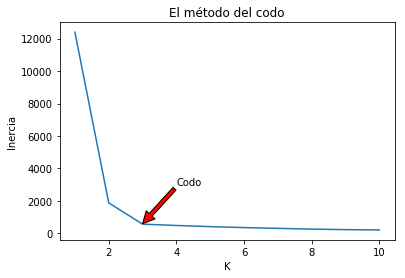

In [24]:
# Me hago un dibujo del codo

plt.plot(range(1,11),inercias)
plt.title('El método del codo')
plt.xlabel('K')
plt.ylabel('Inercia')
plt.annotate('Codo',xy=(3,600), xytext=(4,3000), arrowprops={'facecolor':'red'})

### Ejemplo 2
En este ejemplo vamos a trabajar con el dataset Iris

In [25]:
import pandas as pd

In [27]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Una forma rápida de visualizar los grupos:

In [28]:
iris.columns[1:5]

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

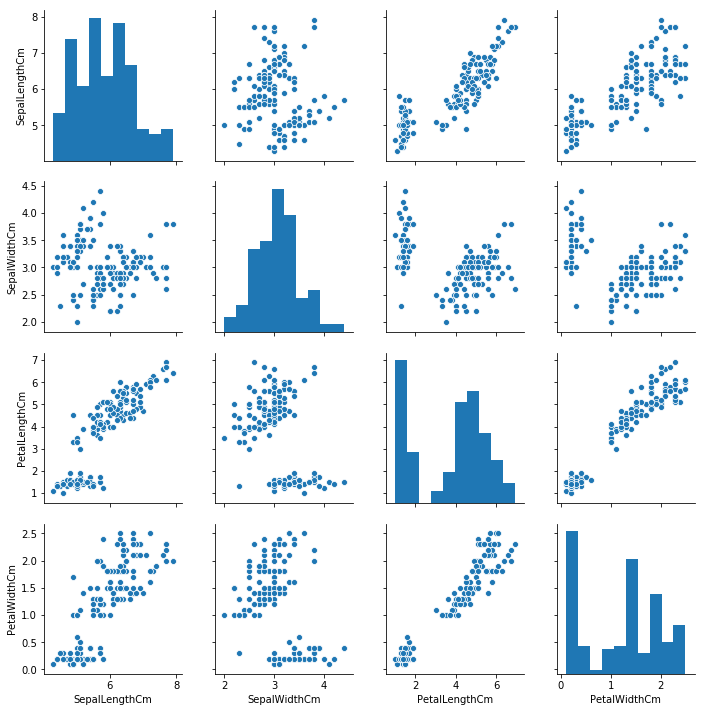

In [29]:
sns.pairplot(iris,vars=iris.columns[1:5])

Visualizamos los grupos de verdad:

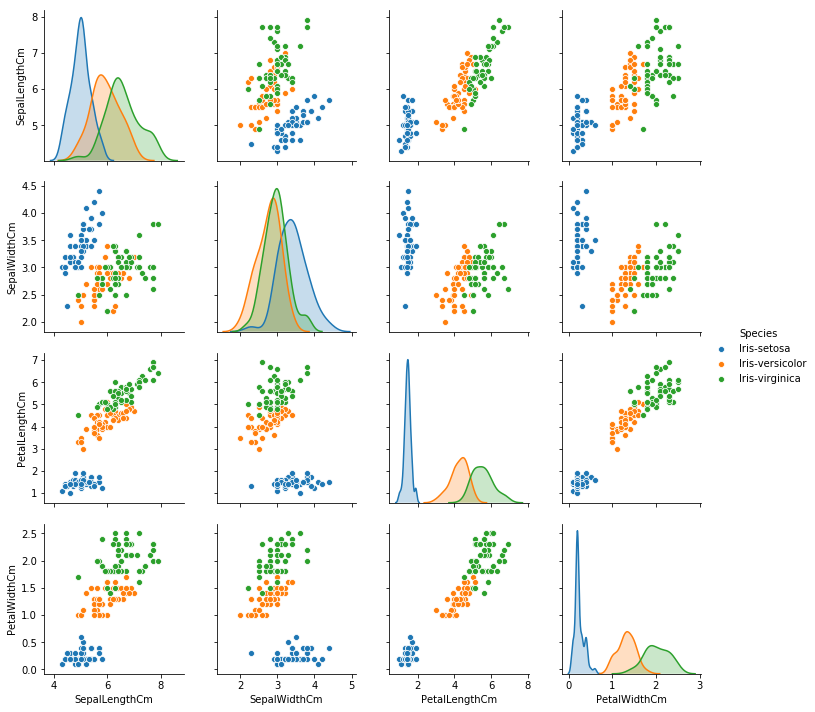

In [30]:
sns.pairplot(iris,vars=iris.columns[1:5],hue='Species')

Antes que nada, definamos X e y

In [31]:
X=iris.iloc[:,1:5]
y=iris.Species

In [33]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

Sabemos que son 3 especies, pero a priori podríamos no saberlo, de hecho a simple vista parecen 2. Usemos el método del codo.

Text(4, 150, 'Codo')

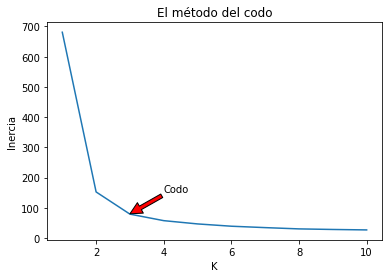

In [37]:
inercias=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,n_init=10)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)
    
# Me hago un dibujo del codo

plt.plot(range(1,11),inercias)
plt.title('El método del codo')
plt.xlabel('K')
plt.ylabel('Inercia')
plt.annotate('Codo',xy=(3,80), xytext=(4,150), arrowprops={'facecolor':'red'})

Son 3 clusters (K=3)

Hago el modelo:

In [38]:
kmeans = KMeans(n_clusters=3,n_init=10) #Defino
kmeans.fit(X) # Ajusto
y_pred=kmeans.predict(X) # Predigo

In [39]:
iris['Species_pred']=y_pred
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_pred
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


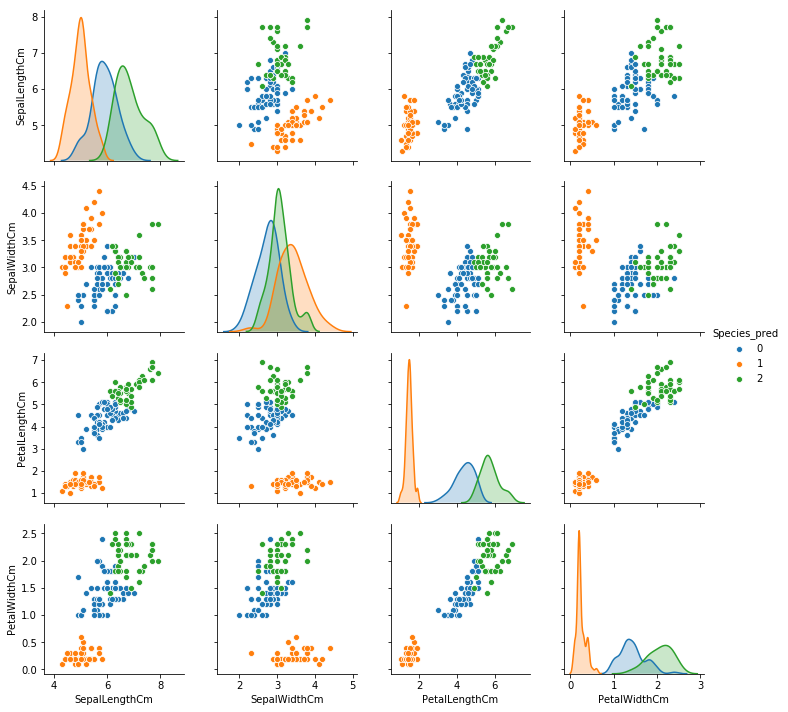

In [40]:
sns.pairplot(iris,vars=iris.columns[1:5],hue='Species_pred')

Para compara algunas más concretamente podemos hacer scatter plots

Los de verdad:

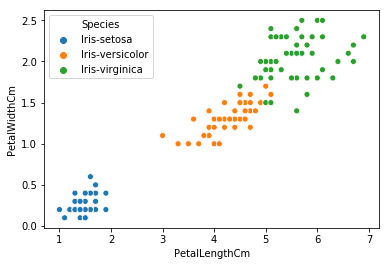

In [41]:
sns.scatterplot(iris['PetalLengthCm'],iris['PetalWidthCm'],hue=iris['Species'])

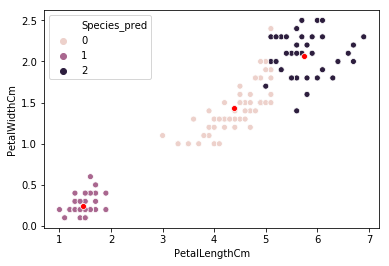

In [42]:
sns.scatterplot(iris['PetalLengthCm'],iris['PetalWidthCm'],hue=iris['Species_pred'])

# Y le añado los centroides
centroides = kmeans.cluster_centers_
sns.scatterplot(centroides[:,2],centroides[:,3], color='red')